# Aim
In this script, we will run a set of simulations to understand the characteristics of DTW.


# 0. Import libraries

In [1]:
# loading in some basic packages
import numpy as np                           # basic data operations
from scipy.spatial import distance
from scipy import interpolate
import matplotlib.pyplot as plt
from dtw import dtw, dtwPlot

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



# 1. Understanding what affects DTW distance
In order to have a better understanding of what DTW is sensitive for, we will generate a set of time series data and examine the output distance score.

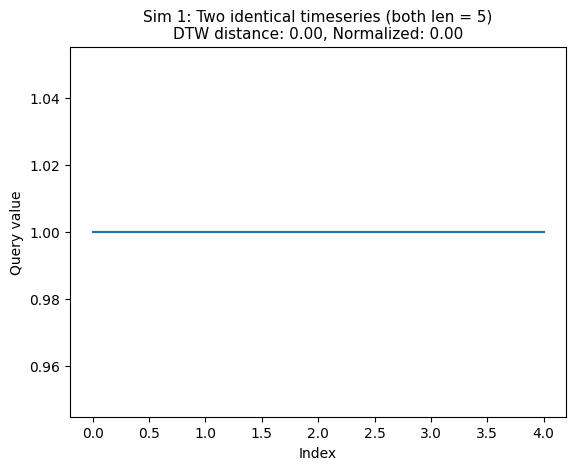

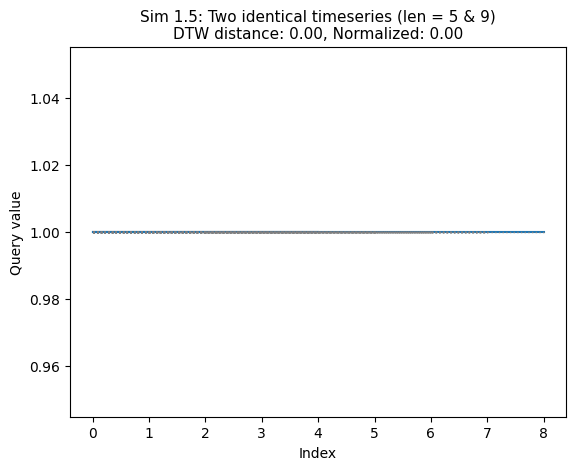

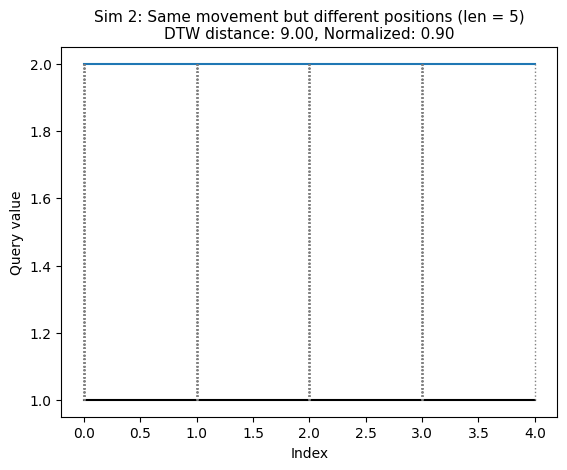

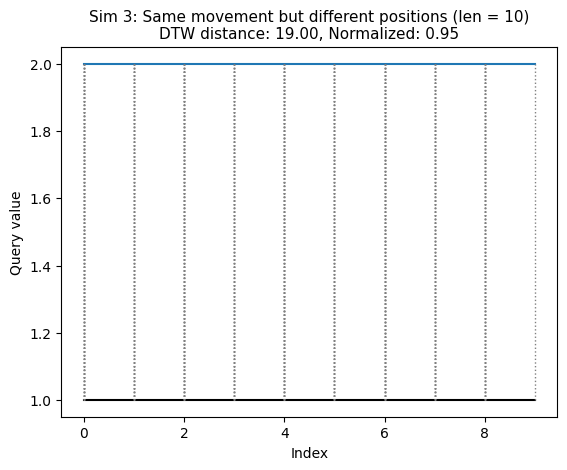

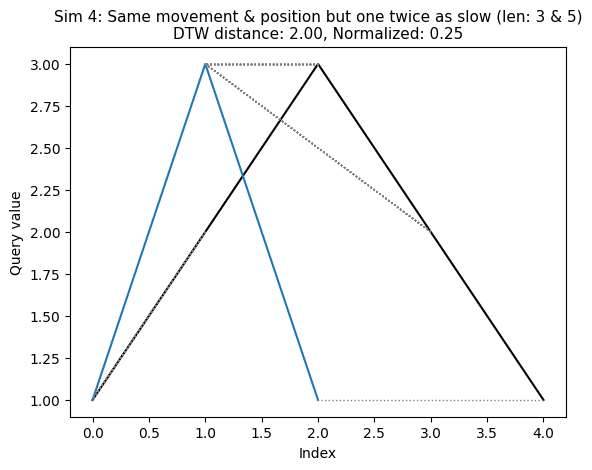

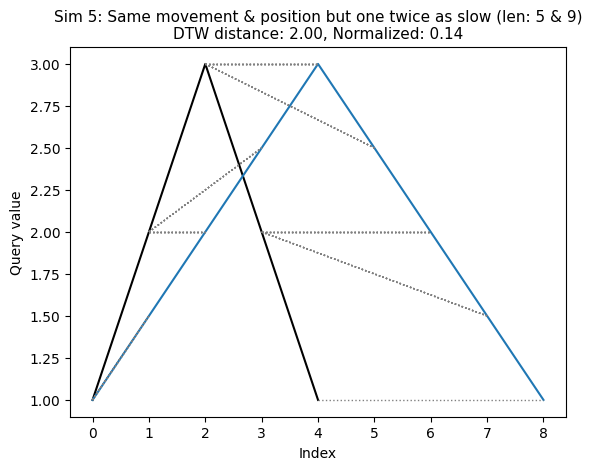

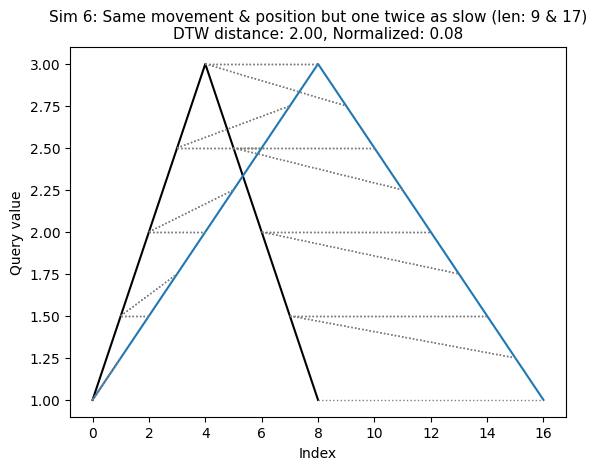

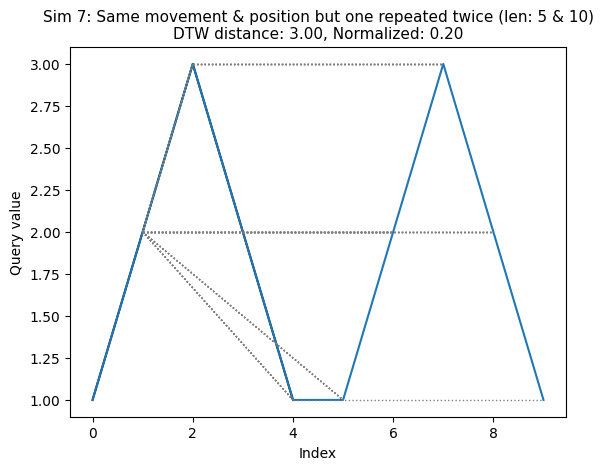

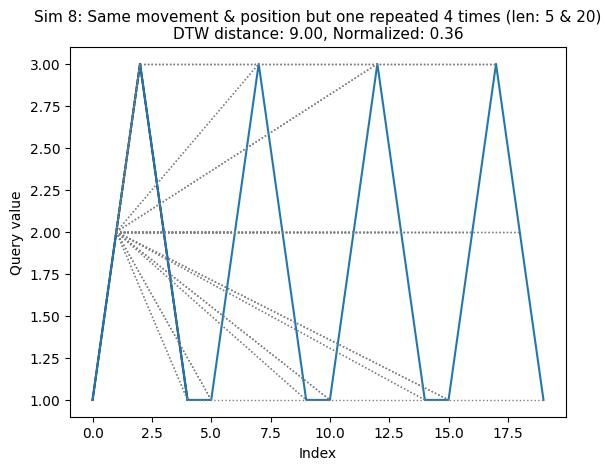

In [23]:
# compute the distance using DTW
def compute_dtw(ts1, ts2, title=None):
    res = dtw(ts1, ts2, 
                keep_internals = True,
                step_pattern = "symmetric2")
    
    dis = res.distance
    dis_normalized = res.normalizedDistance
    # add the result as the title of the plot
    dtwPlot(res, type="twoway")
    title = title + "\n" if title != None else ""
    plt.title(title + f"DTW distance: {dis:.2f}, Normalized: {dis_normalized:.2f}", fontsize=11)



### Simulation 1: Two identical timeseries
sim_ts_1 = [1, 1, 1, 1, 1]
title = "Sim 1: Two identical timeseries (both len = 5)"
compute_dtw(sim_ts_1, sim_ts_1, title)

### Simulation 1.5: Two identical timeseries with different length
sim_ts_1_5 = [1, 1, 1, 1, 1, 1, 1, 1, 1]
title = "Sim 1.5: Two identical timeseries (len = 5 & 9)"
compute_dtw(sim_ts_1, sim_ts_1_5, title)


### Simulation 2: Same pattern, different positions
sim_ts_2 = [2, 2, 2, 2, 2]
title = "Sim 2: Same movement but different positions (len = 5)"
compute_dtw(sim_ts_1, sim_ts_2, title)

### Simulation 3: Longer timeseries with same pattern as Simulation 2
sim_ts_3 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
sim_ts_4 = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
title = "Sim 3: Same movement but different positions (len = 10)"
compute_dtw(sim_ts_3, sim_ts_4, title)

    
### Simulation 4: same movement & position, different speed (length: 3 & 5)
sim_ts_5 = [1, 2, 3, 2, 1]
sim_ts_6 = [1, 3, 1]
title = "Sim 4: Same movement & position but one twice as slow (len: 3 & 5)"
compute_dtw(sim_ts_5, sim_ts_6, title)


### Simulation 5: same movement, different speed (length: 5 & 9)
sim_ts_7 = [1, 1.5, 2, 2.5, 3, 2.5, 2, 1.5, 1]
title = "Sim 5: Same movement & position but one twice as slow (len: 5 & 9)"
compute_dtw(sim_ts_5, sim_ts_7, title)


### Simulation 6: same movement, different speed (length: 9 & 17)
sim_ts_8 = [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 
            2.75, 2.5, 2.25, 2, 1.75, 1.5, 1.25, 1]
title = "Sim 6: Same movement & position but one twice as slow (len: 9 & 17)"
compute_dtw(sim_ts_7, sim_ts_8, title)


### Simulation 7: same movement, one repeated twice
sim_ts_9 = [1, 2, 3, 2, 1, 1, 2, 3, 2, 1]
title = "Sim 7: Same movement & position but one repeated twice (len: 5 & 10)"
compute_dtw(sim_ts_5, sim_ts_9, title)


### Simulation 8: same movement, one repeated thrice, different speed
sim_ts_10 = [1, 2, 3, 2, 1, 
             1, 2, 3, 2, 1,
             1, 2, 3, 2, 1,
             1, 2, 3, 2, 1]
title = "Sim 8: Same movement & position but one repeated 4 times (len: 5 & 20)"
compute_dtw(sim_ts_5, sim_ts_10, title)

Insights:

1. Original and normalize distance both return 0 for identical movements (Sim 1 & 1.5).
2. Original DTW is hugely affected by the duration of movements if identical movements are produced in different positions, but normalized DTW is much less affected by the duration in such cases (Sim 2 & 3).
3. Original and normalized DTW is sensitive to difference in speed (distance won't be 0; Sim 4--6). This also means that comparing two videos in different frame rates lead to higher distance as well.
4. Original DTW distance is insensitive to duration when two movements are identical but in different speed. This means that normalized distance is affected by duration in this case (shorter total length leads to higher distance; Sim 4--6).
5. Original DTW distance linearly increases when one person produces a movement and the other person produces the same movement repeatedly, while the increase in normalized distance is non-linear (Sim 7 & 8). For example, original DTW distance is 3 times higher in Sim 8 than Sim 7 because Sim 8 has two more extra repetitions (each repition costs distance of 3), but the normalized distance is only 1.8 times higher.

# 2. Comparing different methods for normalizition
The dtw-python package normalizes the distance by dividing it by the total length of two time series (N + M), in case of symmetric DTW. However, it has been suggested by one of the reviewers that "*the correct normalization is dividing by the square root of the total number of frames.  This not only (correctly) achieves the invariance you wanted, it also makes the data sample rate invariant. Suppose you measured DTW(A,B) with a cheap 30fps camera and got say 21.17, if your friend had recorded the data with a highspeed camara at 3,000 fps and measured DTW(A’,B’), he would get 21.17 too!*". To test if this is the case, we will generate pairs of time series data, compute two different normalized distance for each pair of time series data, and compare the results. One of the ts data creates a situation for a 1-sec movement where the frame rate is 30 fps, and the other one creates a situation where FPS is 3000 fps.

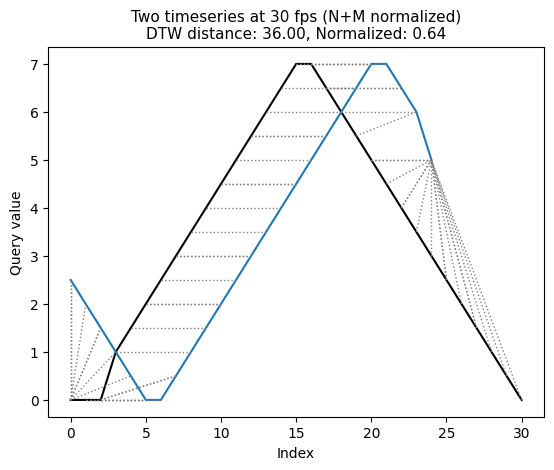

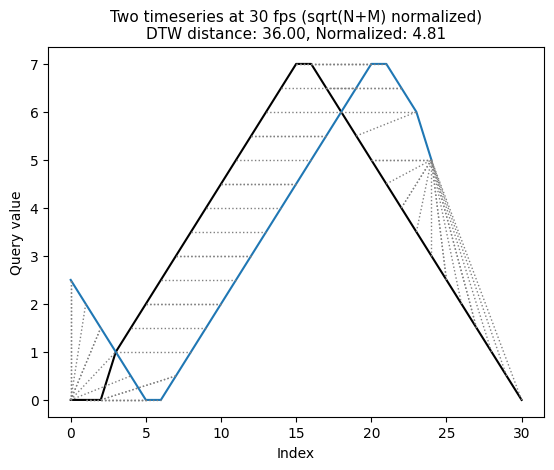

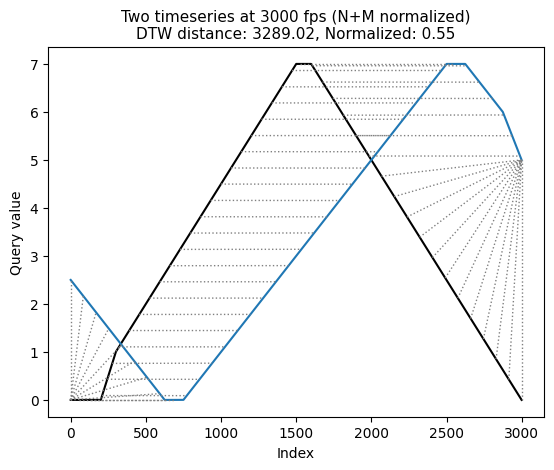

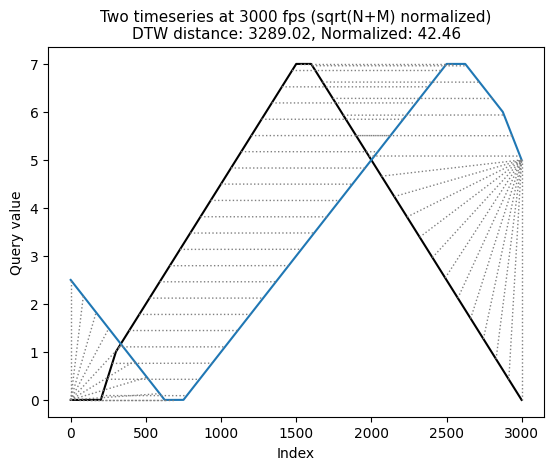

In [8]:
# compute the distance using DTW
def compute_dtw(ts1, ts2, title=None, sqrt=False):
    res = dtw(ts1, ts2, 
                keep_internals = True,
                step_pattern = "symmetric2")
    
    dis = res.distance
    if sqrt:
        dis_normalized = dis / np.sqrt(len(ts1) + len(ts2))
    else:
        dis_normalized = res.normalizedDistance
    # add the result as the title of the plot
    dtwPlot(res, type="twoway")
    title = title + "\n" if title != None else ""
    plt.title(title + f"DTW distance: {dis:.2f}, Normalized: {dis_normalized:.2f}", fontsize=11)

ts1_30fps = [0, 0, 0, 1, 1.5, 2, 2.5, 3, 3.5, 4, 
            4.5, 5, 5.5, 6, 6.5, 7, 7, 6.5, 6, 5.5,
            5, 4.5, 4, 3.5, 3, 2.5, 2, 1.5, 1, 0.5, 0]
ts2_30fps = [2.5, 2, 1.5, 1,
            0.5, 0, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5,
            4, 4.5, 5, 5.5, 6, 6.5, 7, 7, 6.5, 6, 5]

# linearly interpolate to 300 fps
ts1_3000fps = np.interp(np.linspace(0, len(ts1_30fps)-1, 3000), np.arange(len(ts1_30fps)), ts1_30fps)
ts2_3000fps = np.interp(np.linspace(0, len(ts2_30fps)-1, 3000), np.arange(len(ts2_30fps)), ts2_30fps)

### compare the two timeseries at 30 fps
title = "Two timeseries at 30 fps (N+M normalized)"
compute_dtw(ts1_30fps, ts2_30fps, title)
title = "Two timeseries at 30 fps (sqrt(N+M) normalized)"
compute_dtw(ts1_30fps, ts2_30fps, title, sqrt=True)

### compare the two timeseries at 300 fps
title = "Two timeseries at 3000 fps (N+M normalized)"
compute_dtw(ts1_3000fps, ts2_3000fps, title)
title = "Two timeseries at 3000 fps (sqrt(N+M) normalized)"
compute_dtw(ts1_3000fps, ts2_3000fps, title, sqrt=True)

The simulation shows that normalizing distance by `distance / (N+M)` is more robust than by the alternative approach `distance / sqrt(N+M)`. It's important to note that both approaches do not return identical normalized distance for the same movement but at different frame rate.